# Data Visualizations

In [8]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
data = pd.read_csv('../data/clean_df.csv')

In [14]:
data.columns

Index(['brand', 'type', 'gender', 'last_type', 'material', 'lining_material',
       'sole_material', 'season', 'made_in', 'insole_material', 'Name',
       'Rating', 'Code', 'CMR Price', 'Event Price', 'Full Price',
       'discipline', 'interior_material'],
      dtype='object')

In [11]:
mpl.style.use('ggplot')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

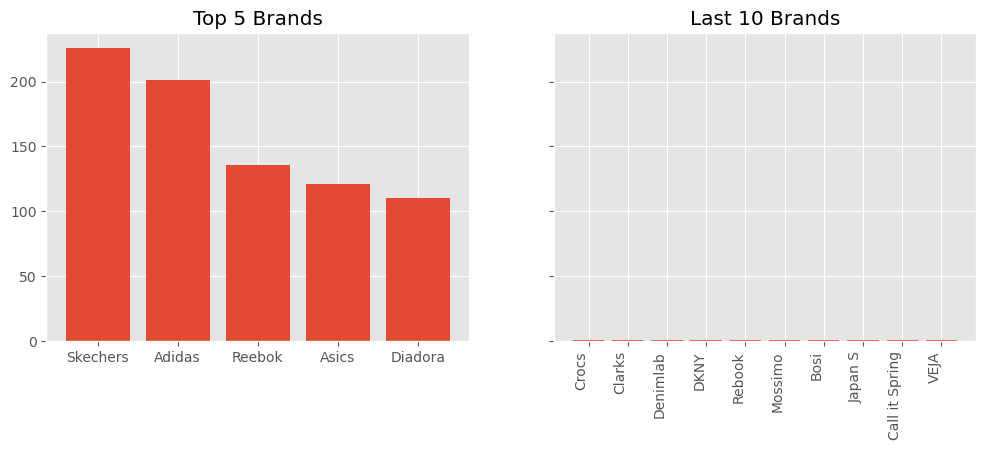

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True, sharex=False)
top_5_brands = data['brand'].value_counts().nlargest(5)
last_10_brands = data['brand'].value_counts().nsmallest(5)
ax[0].bar(top_5_brands.index, top_5_brands.values, label='Cases')
ax[1].bar(last_10_brands.index, last_10_brands.values, label='Cases')
ax[0].set_title('Top 5 Brands')
ax[1].set_title('Last 10 Brands')
# vertical alignment of xtick labels for a1
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90, ha='right')
